In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки для красивых графиков
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
from pathlib import Path

# PROJECT_DIR = папка проекта (где лежат data/ и notebooks/)
PROJECT_DIR = Path().resolve().parent
DATA_FILE = PROJECT_DIR / "data" / "raw" / "application_train.csv"

df = pd.read_csv(DATA_FILE)

In [3]:
# Размер данных
print("Shape:", df.shape)

# Типы признаков
print(df.dtypes.value_counts())

# Общая статистика по числовым признакам
df.describe()

Shape: (307511, 122)
float64    65
int64      41
str        16
Name: count, dtype: int64


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


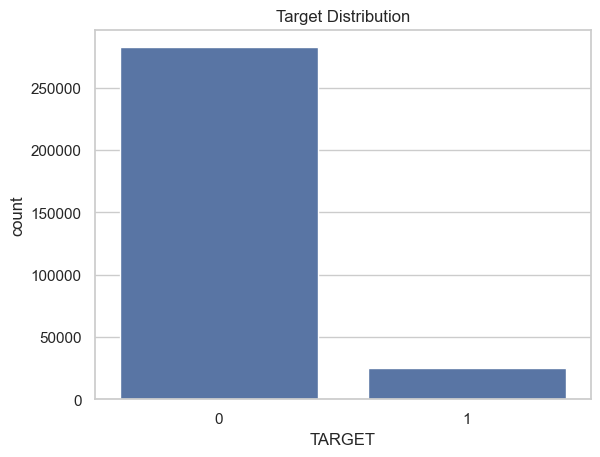

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [4]:
sns.countplot(x="TARGET", data=df)
plt.title("Target Distribution")
plt.show()

# Баланс классов
print(df["TARGET"].value_counts(normalize=True))

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / df.shape[0] * 100).round(2)
pd.DataFrame({"Missing": missing, "%": missing_percent}).head(20)

,Missing,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [6]:
cat_cols = df.select_dtypes(include=["object", "string"]).columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    display(df[col].value_counts().head())

NAME_CONTRACT_TYPE: 2 unique values


NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER: 3 unique values


CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR: 2 unique values


FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY: 2 unique values


FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE: 7 unique values


NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Name: count, dtype: int64

NAME_INCOME_TYPE: 8 unique values


NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Name: count, dtype: int64

NAME_EDUCATION_TYPE: 5 unique values


NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

NAME_FAMILY_STATUS: 6 unique values


NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

NAME_HOUSING_TYPE: 6 unique values


NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Name: count, dtype: int64

OCCUPATION_TYPE: 18 unique values


OCCUPATION_TYPE
Laborers       55186
Sales staff    32102
Core staff     27570
Managers       21371
Drivers        18603
Name: count, dtype: int64

WEEKDAY_APPR_PROCESS_START: 7 unique values


WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
Name: count, dtype: int64

ORGANIZATION_TYPE: 58 unique values


ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

FONDKAPREMONT_MODE: 4 unique values


FONDKAPREMONT_MODE
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: count, dtype: int64

HOUSETYPE_MODE: 3 unique values


HOUSETYPE_MODE
block of flats      150503
specific housing      1499
terraced house        1212
Name: count, dtype: int64

WALLSMATERIAL_MODE: 7 unique values


WALLSMATERIAL_MODE
Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Name: count, dtype: int64

EMERGENCYSTATE_MODE: 2 unique values


EMERGENCYSTATE_MODE
No     159428
Yes      2328
Name: count, dtype: int64

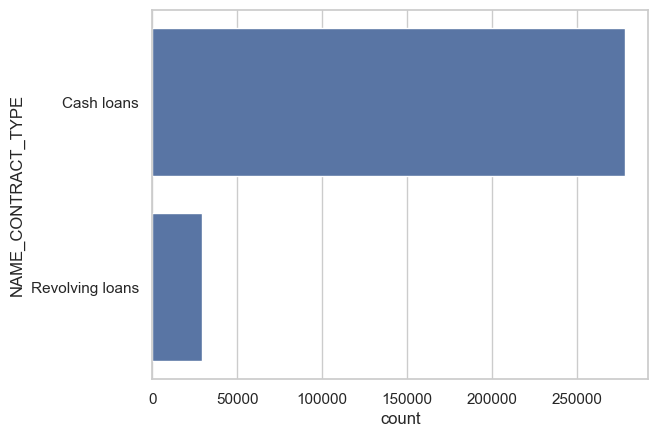

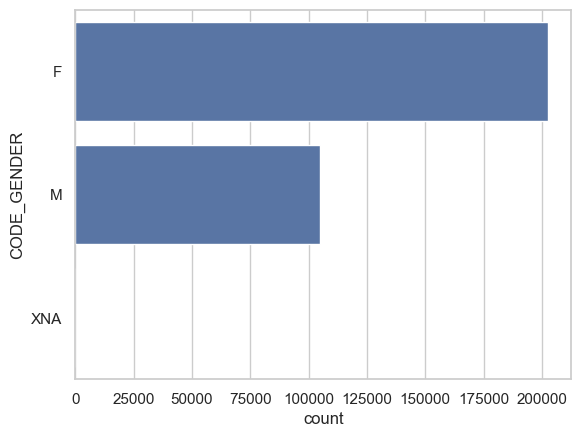

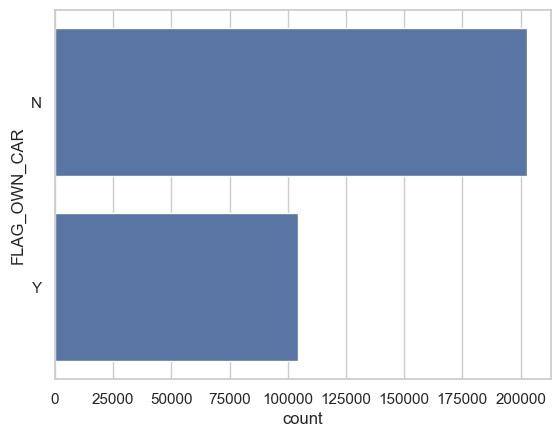

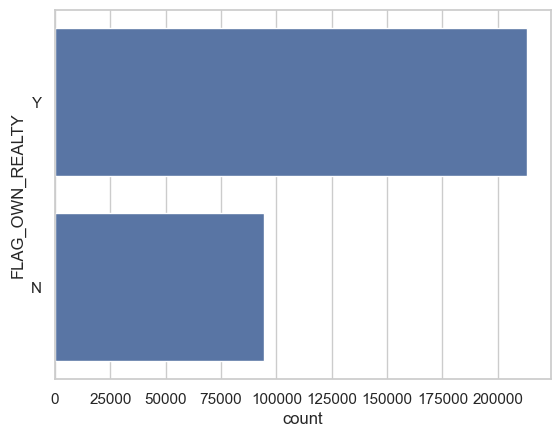

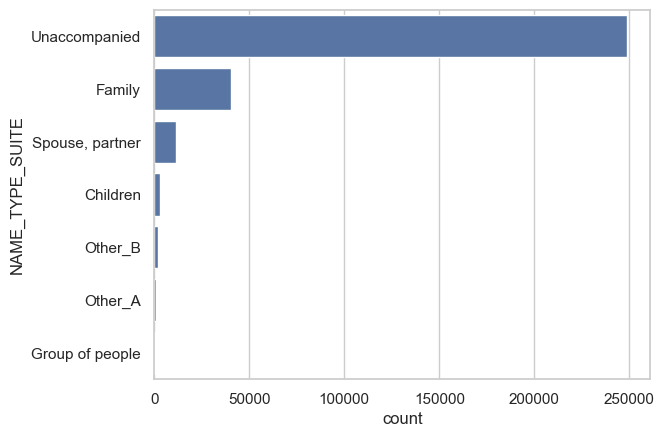

In [7]:
for col in cat_cols[:5]:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.show()

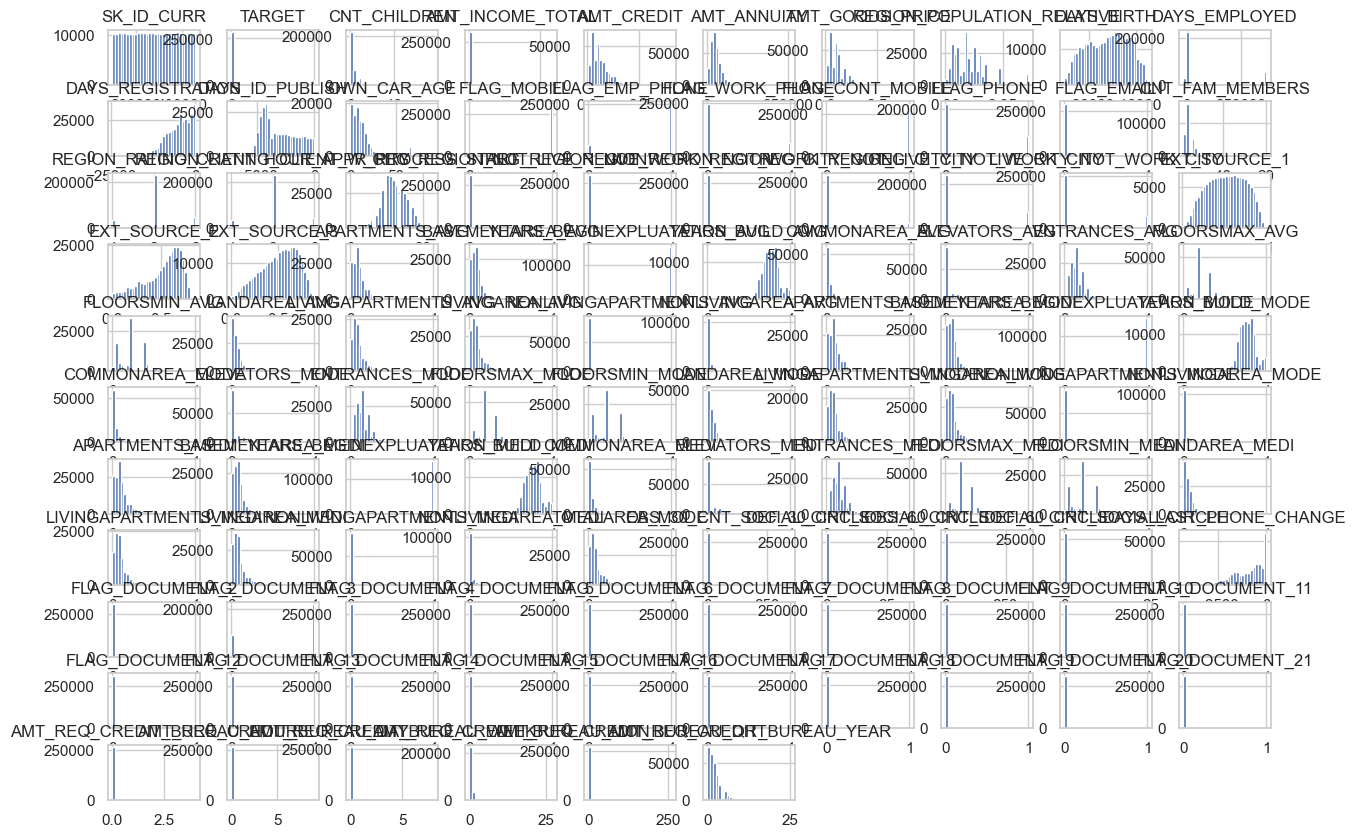

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.show()

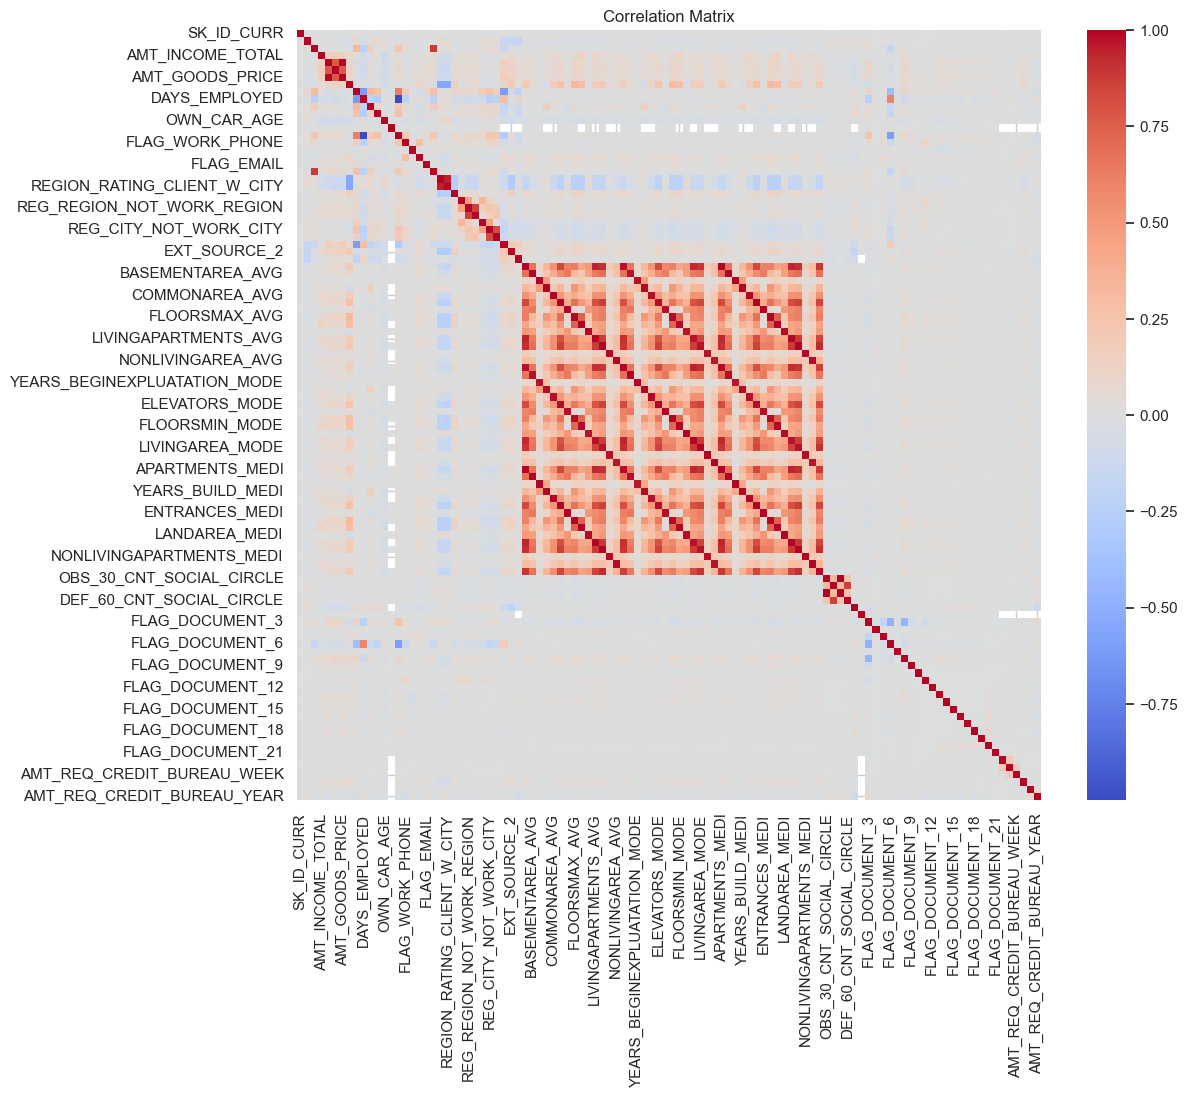

In [9]:
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

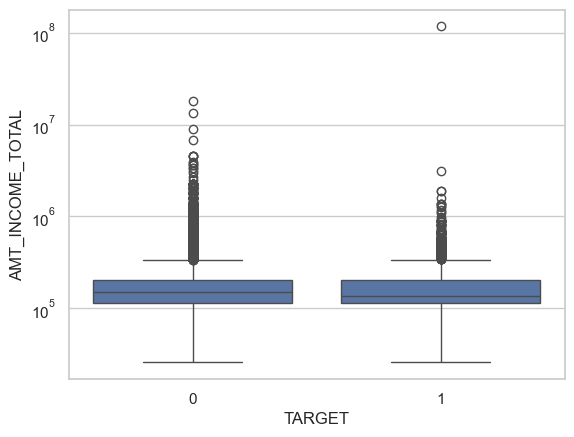

In [10]:
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=df)
plt.yscale('log')
plt.show()

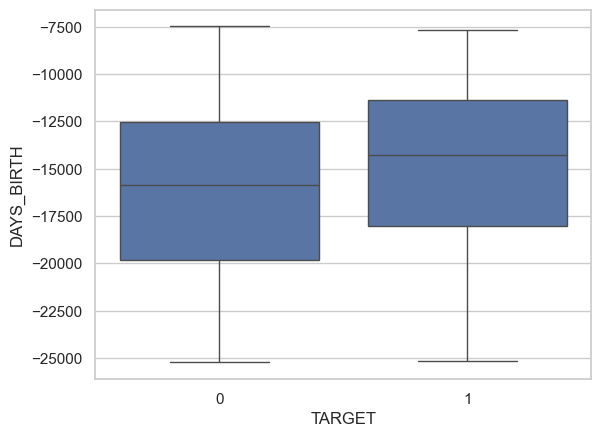

In [11]:
sns.boxplot(x="TARGET", y="DAYS_BIRTH", data=df)
plt.show()

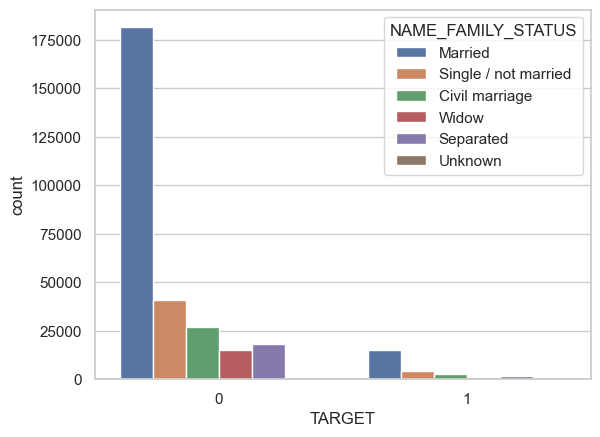

In [12]:
sns.countplot(x="TARGET", hue="NAME_FAMILY_STATUS", data=df)
plt.show()